In [2]:
#Import the library for bulid Machine Learning Model
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer # using for fill the missing value
from sklearn.preprocessing import OrdinalEncoder
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import SelectKBest,chi2,r_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [3]:
# read excel file using read method
Data = pd.read_excel("C:/Users/nxt-1/Desktop/Dataset/Car_Sales.xlsx")

In [4]:
Data_2 = pd.read_excel("C:/Users/nxt-1/Desktop/Dataset/Car_Sales.xlsx")

In [5]:
# display the first 5 row of Data
Data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
# show the sum missing value for each var
Data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [7]:
# show shape of data (how many rows and columns)
Data.shape

(9576, 10)

<AxesSubplot: title={'center': 'car for all value'}>

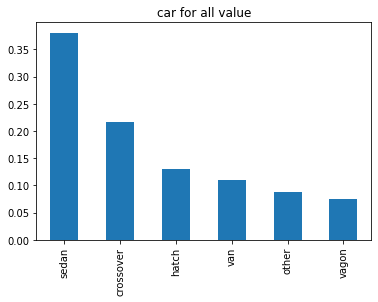

In [9]:
# represent the var "Body" and showing each value
car_v = Data["body"].value_counts()
(car_v/Data.shape[0]).plot(kind='bar',title="car for all value")

In [10]:
# count unique values for each var
Data.nunique()

car               87
price           1353
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            863
drive              3
dtype: int64

In [17]:
# convert the "car" var to int data type
Data["car"] = Data["car"].astype("int64")

In [18]:
# this is import stpes. showing the corr between the var and know the pattern
Data.corr()

,car,price,mileage,engV,year
car,1.000000,-0.122926,-0.126934,-0.013826,0.075025
price,-0.122926,1.000000,-0.312415,0.049804,0.370379
mileage,-0.126934,-0.312415,1.000000,0.045642,-0.495599
engV,-0.013826,0.049804,0.045642,1.000000,-0.040742
year,0.075025,0.370379,-0.495599,-0.040742,1.000000


In [19]:
# count value for "car" var
Data["drive"].value_counts()

front    5188
full     2500
rear     1377
Name: drive, dtype: int64

In [20]:
# because there are missing value at "engV" var so we apply fill_NaN method to fill null value withe mean
Data["engV"].fillna(Data["engV"].mean(),inplace=True)

In [21]:
# using SimpleImputer to fill nan value by using "Most_Frequent"
SM = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
Data["drive"] = SM.fit_transform(Data['drive'].values.reshape(-1,1))[:,0]

In [22]:
np.set_printoptions(threshold=sys.maxsize)
np.array(Data["car"].unique())

array([ 4,  1,  2,  6,  3,  5,  0,  7,  9, 11, 12, 13, 14, 15, 17],
      dtype=int64)

In [23]:
# but the all the value multi array
American = ["Ford","Chrysler","Chevrolet","Tesla","Dodge","Jeep","Hummer","Cadillac","GMC","Lincoln","Mercury","Fisker","Buick"]
German =   ["Mercedes-Benz","BMW","Volkswagen","Audi","Porsche","Smart","Other-Retro","Barkas","Wartburg"]
Japanese = ["Nissan","Honda","Mitsubishi","Toyota","Mazda","Lexus","Infiniti","Subaru","Suzuki","Acura","Isuzu","Daihatsu"]
French =   ["Renault","Peugeot","Citroen","Dacia"]
British =  ["Land Rover","Jaguar","Bentley","MINI","Aston Martin","Rover","Rolls-Royce","MG"]
Korea =    ["Kia","Hyundai","Daewoo","SsangYong","Samsung"]
Czech =    ["Skoda"]
Russian =  ["Vaz","GAZ","UAZ","Moskvich-AZLK","Moskvich-Izh","Aro"]
Italian =  ["Alfa Romeo","Fiat","Maserati","Lancia","Ferrari","Lamborghini"]
Chinese =  ["Chery","Great Wall","Geely","BYD","FAW","ZX","Lifan","Dadi","JAC","Hafei","SMA","Changan","Huanghai"]
Swedish =  ["Volvo","Saab"]
Ukraine =  ["ZAZ","Groz","Bogdan"]
Spanish =  ["Seat"]
India =    ["TATA"]
Iranian =  ["Samand"]

In [24]:
# replace value
Data["car"] = Data["car"].replace(American,"American")
Data["car"] = Data["car"].replace(German,"German")
Data["car"] = Data["car"].replace(Japanese,"Japanese")
Data["car"] = Data["car"].replace(French,"French")
Data["car"] = Data["car"].replace(British,"British")
Data["car"] = Data["car"].replace(Korea,"Korea")
Data["car"] = Data["car"].replace(Czech,"Czech")
Data["car"] = Data["car"].replace(Russian,"Russian")
Data["car"] = Data["car"].replace(Italian,"Italian")
Data["car"] = Data["car"].replace(Chinese,"Chinese")
Data["car"] = Data["car"].replace(Swedish,"Swedish")
Data["car"] = Data["car"].replace(Ukraine,"Ukraine")
Data["car"] = Data["car"].replace(Spanish,"Spanish")
Data["car"] = Data["car"].replace(India,"India")
Data["car"] = Data["car"].replace(Spanish,"Spanish")
Data["car"] = Data["car"].replace(Iranian,"Iranian")

In [25]:
Data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,4,15500.0,crossover,68,2.500000,Gas,yes,2010,Kuga,full
1,1,20500.0,sedan,173,1.800000,Gas,yes,2011,E-Class,rear
2,1,35000.0,other,135,5.500000,Petrol,yes,2008,CL 550,rear
3,1,17800.0,van,162,1.800000,Diesel,yes,2012,B 180,front
4,1,33000.0,vagon,91,2.646344,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9571,5,14500.0,crossover,140,2.000000,Gas,yes,2011,Tucson,front
9572,1,2200.0,vagon,150,1.600000,Petrol,yes,1986,Passat B2,front
9573,1,18500.0,crossover,180,3.500000,Petrol,yes,2008,ML 350,full
9574,2,16999.0,sedan,150,3.500000,Gas,yes,2008,ES 350,front


In [26]:
Data.nunique()

car               15
price           1353
body               6
mileage          442
engV             118
engType            4
registration       2
year              56
model            863
drive              3
dtype: int64

In [27]:
Data.groupby(Data["car"]).sum().sort_values(by="price",ascending=False)

,price,mileage,engV,year
car,,,,
1,6.650763e+07,530515,9311.646911,6339219
2,3.453899e+07,249756,5707.245732,4151832
3,1.206195e+07,19312,790.425377,430230
4,1.005966e+07,86326,1618.658184,1418919
5,8.728960e+06,91594,1819.307429,1733633
6,6.194260e+06,115661,1957.160543,1548373
7,3.938992e+06,47150,639.136132,739286
0,3.899369e+06,128663,2046.903774,1791145
9,1.451282e+06,22448,244.485377,274821


In [28]:
Data["car"] = Data["car"].replace("American",4)
Data["car"] = Data["car"].replace("German",1)
Data["car"] = Data["car"].replace("Japanese",2)
Data["car"] = Data["car"].replace("French",6)
Data["car"] = Data["car"].replace("British",3)
Data["car"] = Data["car"].replace("Korea",5)
Data["car"] = Data["car"].replace("Czech",7)
Data["car"] = Data["car"].replace("Russian",15)
Data["car"] = Data["car"].replace("Italian",9)
Data["car"] = Data["car"].replace("Chinese",11)
Data["car"] = Data["car"].replace("Swedish",12)
Data["car"] = Data["car"].replace("Ukraine",13)
Data["car"] = Data["car"].replace("Spanish",14)
Data["car"] = Data["car"].replace("India",17)
Data["car"] = Data["car"].replace("Spanish",14)
Data["car"] = Data["car"].replace("Opel",0)
Data["car"] = Data["car"].replace("VAZ",0)
Data["car"] = Data["car"].replace("�UAZ",0)
Data["car"] = Data["car"].replace("Iranian",17)

In [29]:
OE  = OrdinalEncoder()

In [30]:
Data_Categorical = ["model","drive","engType","registration","body"]
Data[Data_Categorical]  = Data[Data_Categorical].astype("str")
Data["car"] = Data["car"].astype("int64")

In [31]:
OE.fit(Data[Data_Categorical])

OrdinalEncoder()

In [32]:
Data[Data_Categorical] = OE.transform(Data[Data_Categorical])

In [33]:
Data.corr()

,car,price,body,mileage,engV,engType,registration,year,model,drive
car,1.000000,-0.122926,0.027212,-0.126934,-0.013826,0.031979,0.096148,0.075025,0.052144,-0.270942
price,-0.122926,1.000000,-0.237067,-0.312415,0.049804,-0.008369,0.120849,0.370379,0.135268,0.211071
body,0.027212,-0.237067,1.000000,0.288219,-0.022295,-0.177783,-0.079314,-0.161182,-0.094825,-0.155765
mileage,-0.126934,-0.312415,0.288219,1.000000,0.045642,-0.218869,-0.225007,-0.495599,-0.005977,0.059103
engV,-0.013826,0.049804,-0.022295,0.045642,1.000000,-0.007580,-0.017441,-0.040742,0.000540,0.064433
engType,0.031979,-0.008369,-0.177783,-0.218869,-0.007580,1.000000,0.148864,-0.045471,-0.187236,-0.048850
registration,0.096148,0.120849,-0.079314,-0.225007,-0.017441,0.148864,1.000000,0.177738,0.062089,-0.045099
year,0.075025,0.370379,-0.161182,-0.495599,-0.040742,-0.045471,0.177738,1.000000,0.226669,-0.149796
model,0.052144,0.135268,-0.094825,-0.005977,0.000540,-0.187236,0.062089,0.226669,1.000000,-0.041104
drive,-0.270942,0.211071,-0.155765,0.059103,0.064433,-0.048850,-0.045099,-0.149796,-0.041104,1.000000


In [34]:
Data.nunique()

car               15
price           1353
body               6
mileage          442
engV             118
engType            4
registration       2
year              56
model            863
drive              3
dtype: int64

In [35]:
Data[Data_Categorical] = Data[Data_Categorical].astype(dtype="int64")

In [36]:
Features = ["car","engV","registration","drive","model","year","mileage"]

In [37]:
X = Data[Features]
y = Data["price"]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50)

In [39]:
Model = RandomForestRegressor(n_estimators=50,max_depth=22,max_features="log2")

In [40]:
Model.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, max_features='log2', n_estimators=50)

In [41]:
y_pred = Model.predict(X)

In [42]:
mean_squared_error(y,y_pred)

154427701.40022728

In [48]:
cross_val_score(Model,X_test,y_test,cv=10).mean()*100

57.16866721287811

In [47]:
r2_score(y,y_pred)*100

73.42327900126566

In [124]:
Data_2["price_predict"] = y_pred.astype("int64")

In [135]:
Data_2

,car,price,body,mileage,engV,engType,registration,year,model,drive,price_predict
0,Ford,15500,crossover,68,2.5,Gas,yes,2010,Kuga,full,16050
1,Mercedes-Benz,20500,sedan,173,1.8,Gas,yes,2011,E-Class,rear,20722
2,Mercedes-Benz,35000,other,135,5.5,Petrol,yes,2008,CL 550,rear,34870
3,Mercedes-Benz,17800,van,162,1.8,Diesel,yes,2012,B 180,front,18303
4,Mercedes-Benz,33000,vagon,91,NaN,Other,yes,2013,E-Class,NaN,16043
...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500,crossover,140,2.0,Gas,yes,2011,Tucson,front,10673
9572,Volkswagen,2200,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,2606
9573,Mercedes-Benz,18500,crossover,180,3.5,Petrol,yes,2008,ML 350,full,20298
9574,Lexus,16999,sedan,150,3.5,Gas,yes,2008,ES 350,front,16674
